In [641]:
import os
import csv
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [642]:
filepath1 = os.path.join('resources', 'pyber_raw_data','city_data.csv')
filepath2 = os.path.join('resources', 'pyber_raw_data', 'ride_data.csv')
city_df = pd.read_csv(filepath1)
ride_df = pd.read_csv(filepath2)
city_df = city_df.drop_duplicates('city', keep = 'first')
merge_df = pd.merge(city_df,ride_df, how='outer', on='city')


In [643]:
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [644]:

merge_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


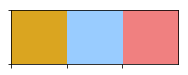

In [645]:
#COLOR SCHEME GOLD, LIGHT SKY BLUE, AND LIGHT CORAL
colors = {'Gold':'#DAA520', 'Light Sky Blue':'#99CCFF','Light Coral':'#F08080'}
sns.palplot(sns.color_palette(colors.values()))
plt.show()

In [646]:
cgrp = merge_df.groupby('city')
#Average Fare ($) Per City
avg_fr_cty = citygroup.mean()['fare']
#Total Number of Rides Per City
rides = cgrp['ride_id'].count()
#Total Number of Drivers Per City
drivers = cgrp.mean()['driver_count']
#City Type (Urban, Suburban, Rural)
ctype = city_df.set_index('city')['type']

In [647]:
stats = pd.DataFrame({'# of Rides': rides, 'Average Fare': avg_fr_cty, '# of Drivers': drivers, 'Type of City': ctype})

In [649]:
#Light Blue
urb = stats[stats['Type of City'] == 'Urban']
#light Coral
sub = stats[stats['Type of City'] == 'Suburban']
#Gold
rur = stats[stats['Type of City'] == 'Rural']

ccolor = {'Urban': colors['Light Sky Blue'], 'Suburban': colors['Light Coral'], 'Rural': colors['Gold']}

a = plt.scatter(urb['# of Rides'], urb['Average Fare'], s = urb['# of Drivers']*5, color = ccolor['Urban'], edgecolor = 'black', label = 'Urban', alpha = .75)
b = plt.scatter(sub['# of Rides'], sub['Average Fare'], s = sub['# of Drivers']*5, color = ccolor['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .75)
c = plt.scatter(rur['# of Rides'], rur['Average Fare'], s = rur['# of Drivers']*5, color = ccolor['Rural'], edgecolor = 'black', label = 'Rural', alpha = .75)



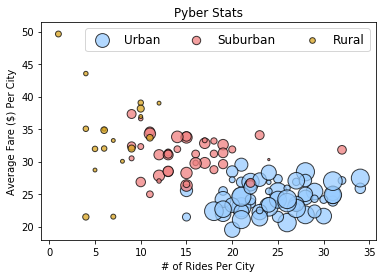

In [650]:
plt.title('Pyber Stats')
plt.xlabel('# of Rides Per City')
plt.ylabel('Average Fare ($) Per City')

plt.legend((a, b, c), ('Urban', 'Suburban', 'Rural'), scatterpoints=1,
            loc='upper right',
            ncol=4,
            fontsize=12)
plt.show()



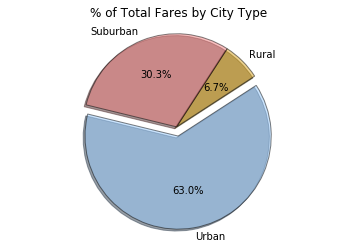

In [651]:

#group by type
by_type = merge_df.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

#total fare by city
fare_sum = by_type.sum()['fare']

#labels
labels = fare_sum.index

#pie colors
piecolors = [ccolor[n] for n in labels]
explode = [0 , 0, .1]
plt.pie(fare_sum, colors = piecolors, explode = explode, labels = labels, autopct = "%1.1f%%", startangle = 33, shadow = True, wedgeprops = {'linewidth': 1, 'edgecolor': 'black', 'alpha': .5})

plt.title('% of Total Fares by City Type')
plt.axis('equal')
plt.show()

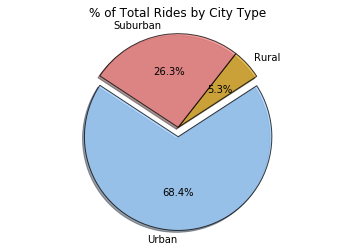

In [652]:
# number of ride per city type
ride_sum = by_type.count()['ride_id']

labels = ride_sum.index
plt.pie(ride_sum, explode = explode, colors = piecolors, labels = labels, autopct = "%1.1f%%", startangle = 33, shadow = True, wedgeprops = {'linewidth': 1, 'edgecolor': 'black', 'alpha': .75})
plt.title('% of Total Rides by City Type')
plt.axis('equal')
plt.show()

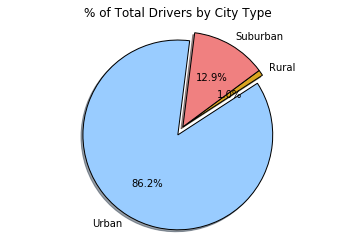

In [653]:
driver_sum = by_type.sum()['driver_count']

labels = driver_sum.index
plt.pie(driver_sum, explode = explode, colors = piecolors, labels = labels, autopct = "%1.1f%%", startangle = 33, shadow = True, wedgeprops = {'linewidth': 1, 'edgecolor': 'black', 'alpha': 1})
plt.title('% of Total Drivers by City Type')
plt.axis('equal')
plt.show()